# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [ ]:
data['quality'].value_counts()

quality
2    2198
1    1457
3     880
0     183
4     180
Name: count, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [ ]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

11

### (1) 모델1

In [ ]:
#메모리 정리
clear_session()

#모델
model = Sequential([Dense(5, input_shape = (nfeatures, ), activation = 'relu'),
                    Dense(3, activation = 'relu'),
                    Dense(5, activation = 'softmax')])

#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
Total params: 98 (392.00 Byte)
Trainable params: 98 (392.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 50, validation_split = 0.2, verbose = 0).history

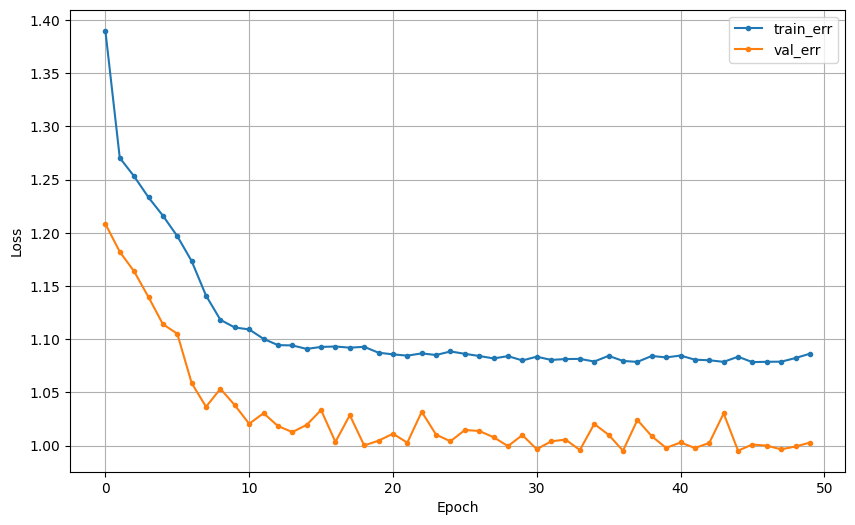

In [ ]:
dl_history_plot(history)

In [ ]:
pred = model.predict(x_val)
pred = pred.argmax(axis = 1)

46/46 [==============================] - 0s 1ms/step


In [ ]:
print(confusion_matrix(y_val,pred))
print(classification_report(y_val,pred))

[[  3  39  19   0   0]
 [  3 240 195   0   0]
 [  2 138 484  36   0]
 [  0   8 207  35   0]
 [  0   2  50   9   0]]
              precision    recall  f1-score   support

           0       0.38      0.05      0.09        61
           1       0.56      0.55      0.55       438
           2       0.51      0.73      0.60       660
           3       0.44      0.14      0.21       250
           4       0.00      0.00      0.00        61

    accuracy                           0.52      1470
   macro avg       0.38      0.29      0.29      1470
weighted avg       0.48      0.52      0.47      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (2) 모델2

In [ ]:
#메모리 정리
clear_session()

#모델
model2 = Sequential([Dense(18, input_shape = (nfeatures, ), activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(5, activation = 'softmax')])

#모델 요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                216       
                                                                 
 dense_1 (Dense)             (None, 8)                 152       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 413 (1.61 KB)
Trainable params: 413 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')
history2 = model2.fit(x_train, y_train, epochs = 100, validation_split = 0.2, verbose = 0).history

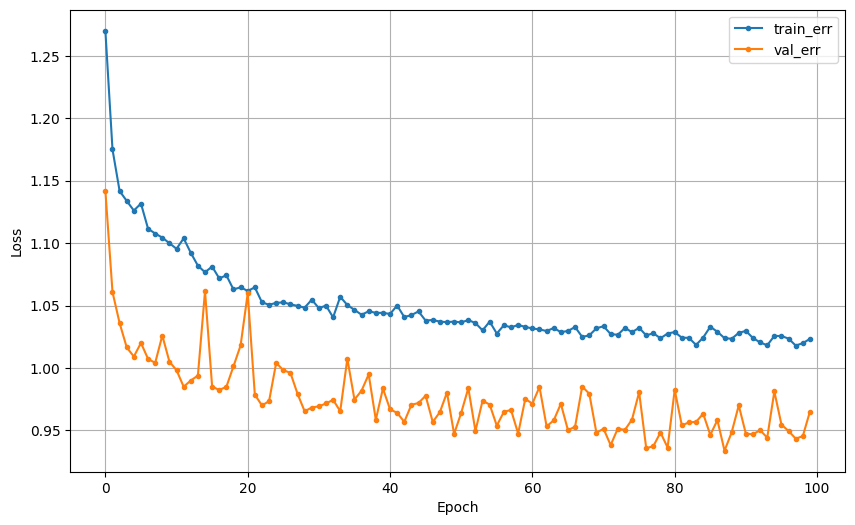

In [ ]:
dl_history_plot(history2)

In [ ]:
pred2 = model.predict(x_val)
pred2 = pred2.argmax(axis = 1)

46/46 [==============================] - 0s 2ms/step


In [ ]:
print(confusion_matrix(y_val,pred2))
print(classification_report(y_val,pred2))

[[  3  39  19   0   0]
 [  3 240 195   0   0]
 [  2 138 484  36   0]
 [  0   8 207  35   0]
 [  0   2  50   9   0]]
              precision    recall  f1-score   support

           0       0.38      0.05      0.09        61
           1       0.56      0.55      0.55       438
           2       0.51      0.73      0.60       660
           3       0.44      0.14      0.21       250
           4       0.00      0.00      0.00        61

    accuracy                           0.52      1470
   macro avg       0.38      0.29      0.29      1470
weighted avg       0.48      0.52      0.47      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (3) 모델3

In [ ]:
#메모리 정리
clear_session()

#모델
model3 = Sequential([Dense(10, input_shape = (nfeatures, ), activation = 'relu'),
                    Dense(5, activation = 'relu'),
                    Dense(5, activation = 'softmax')])

#모델 요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 205 (820.00 Byte)
Trainable params: 205 (820.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')
history3 = model3.fit(x_train, y_train, epochs = 50, validation_split = 0.2, verbose = 0).history

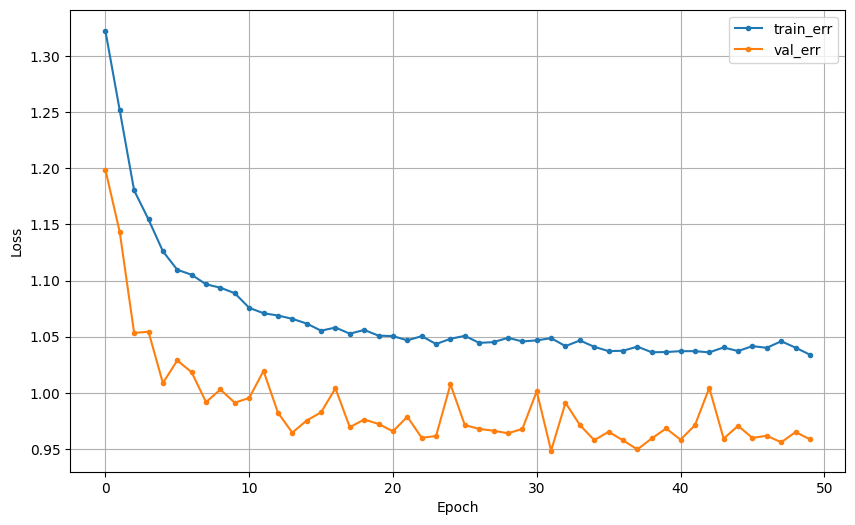

In [ ]:
dl_history_plot(history3)

In [ ]:
pred3 = model3.predict(x_val)
pred3 = pred3.argmax(axis = 1)

46/46 [==============================] - 0s 3ms/step


In [ ]:
print(confusion_matrix(y_val,pred3))
print(classification_report(y_val,pred3))

[[  5  44  12   0   0]
 [  2 283 149   4   0]
 [  2 155 469  34   0]
 [  0  12 182  56   0]
 [  0   1  40  20   0]]
              precision    recall  f1-score   support

           0       0.56      0.08      0.14        61
           1       0.57      0.65      0.61       438
           2       0.55      0.71      0.62       660
           3       0.49      0.22      0.31       250
           4       0.00      0.00      0.00        61

    accuracy                           0.55      1470
   macro avg       0.43      0.33      0.34      1470
weighted avg       0.52      0.55      0.52      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
